### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [5]:
import numpy as np
from sclibrary import read_csv, SCPlot
from sclibrary.io.network_reader import get_coordinates
from sclibrary.filters import LSFilterDesign
import matplotlib.pyplot as plt


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


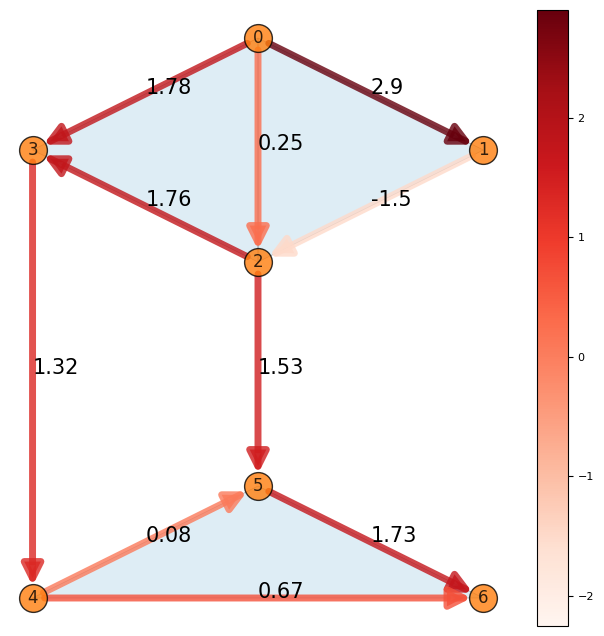

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

scplot.draw_network(edge_flow=f)

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.4152336658972069
Filter size: 2 - Error: 0.41904808529540327
Filter size: 3 - Error: 0.4118319019419963
Error: 0.38560431954906266


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


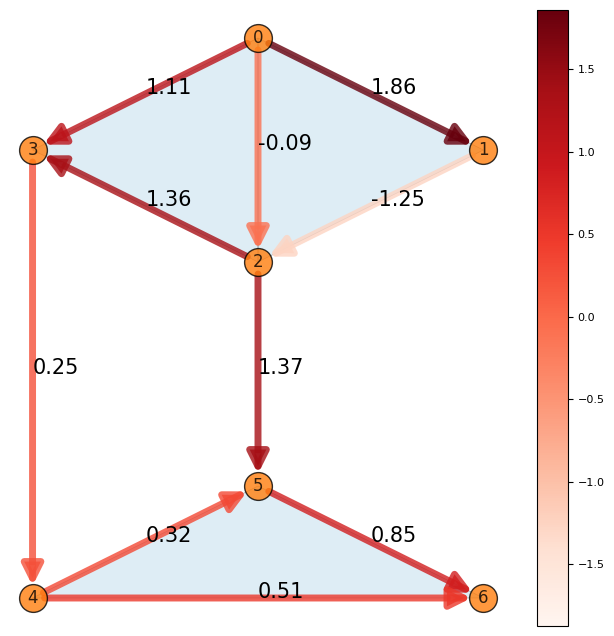

In [4]:
filter_size = 4

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.4152336658972069
Filter size: 2 - Error: 0.41904808529540366
Filter size: 3 - Error: 0.41183190194200425
Filter size: 4 - Error: 0.377525662014333
Filter size: 5 - Error: 0.35230542385029257
Filter size: 6 - Error: 0.36601414920608705
Filter size: 7 - Error: 0.36814070344558114
Filter size: 8 - Error: 0.10490222535788651
Filter size: 9 - Error: 1.1307939485652426e-05
Filter size: 10 - Error: 2.6072353992310823e-05
Filter size: 11 - Error: 5.259110276081862e-05
Filter size: 12 - Error: 0.00010378884394777374
Filter size: 13 - Error: 0.00020780280656951716
Filter size: 14 - Error: 0.00042761397926321633
Filter size: 15 - Error: 0.000906142715654587
Filter size: 16 - Error: 0.002073380661428748
Filter size: 0 - Error: 1.6043606226735492
Filter size: 1 - Error: 1.6240543685705808
Filter size: 2 - Error: 1.7614748067357553
Filter size: 3 - Error: 1.748875099802941
Filter size: 4 - Error: 1.7329971070291508
Filter size: 5 -

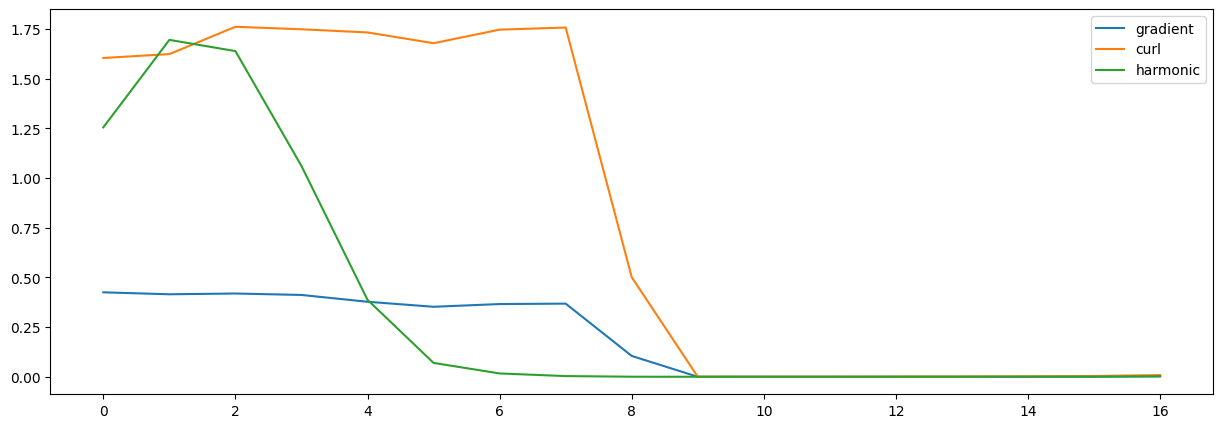

In [7]:
import matplotlib.pyplot as plt

filter_size = 17
plt.figure(figsize=(15, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="harmonic")

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

[0, 1, 1, 1, 1, 1, 1]
7
(7, 4)
Filter size: 0 - Error: 0.25016749791524423
Filter size: 1 - Error: 0.24109540112283107
Filter size: 2 - Error: 0.20246224920061956
Filter size: 3 - Error: 0.11576740315545293
Error: 0.3434840114724925


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


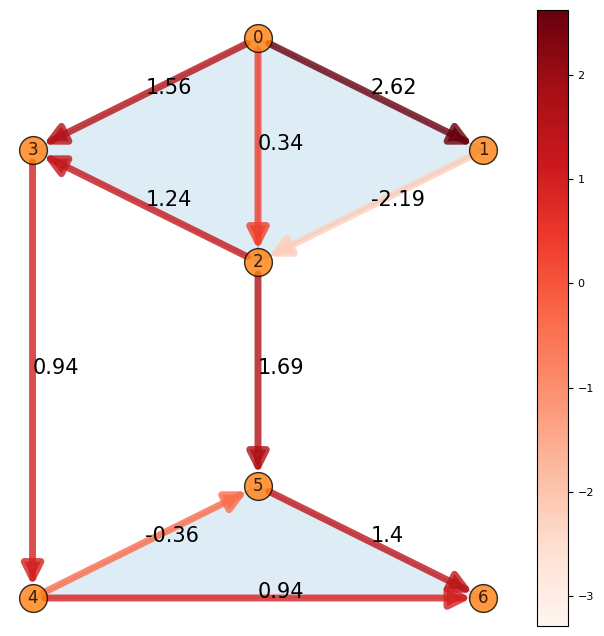

In [5]:
filter_range = 4

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

7
(7, 16)
Filter size: 0 - Error: 0.25016749791524423
Filter size: 1 - Error: 0.24109540112283107
Filter size: 2 - Error: 0.20246224920061978
Filter size: 3 - Error: 0.11576740315545093
Filter size: 4 - Error: 0.039771241632658924
Filter size: 5 - Error: 0.003184589673014043
Filter size: 6 - Error: 6.44291626637134e-09
Filter size: 7 - Error: 2.749374756932155e-08
Filter size: 8 - Error: 1.3616148109068374e-07
Filter size: 9 - Error: 6.639431801777636e-07
Filter size: 10 - Error: 3.1435965818298484e-06
Filter size: 11 - Error: 1.4511315055662547e-05
Filter size: 12 - Error: 6.584614217304163e-05
Filter size: 13 - Error: 0.00029452663550765635
Filter size: 14 - Error: 0.0013103147005250702
Filter size: 15 - Error: 0.005807260305164854
Error: 0.3751011807139308


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


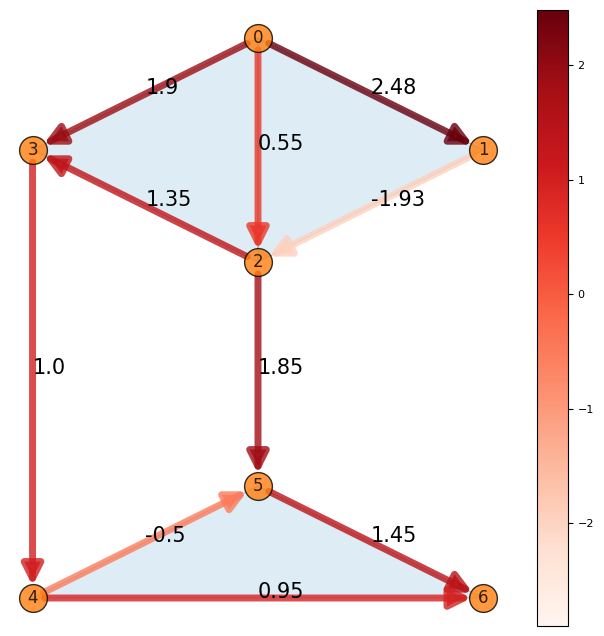

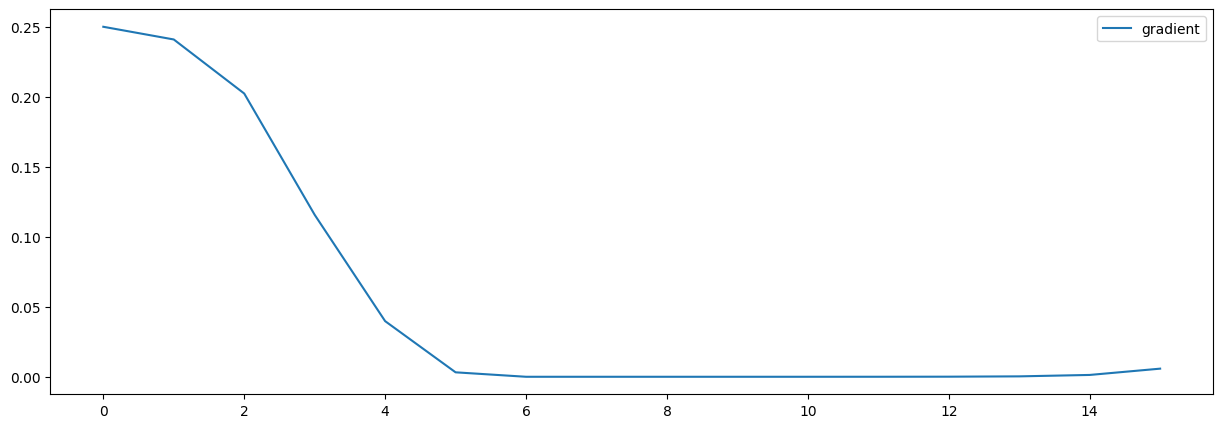

In [12]:
filter_range = 16

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f0))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(range(filter_range), lsfilter.history["error_per_filter_size"], label="gradient")
plt.legend()

#### General Filter

Error: 0.4568487311086471


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_91814/2426216461.py:10: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_network(edge_flow=np.round(f_est, 2))


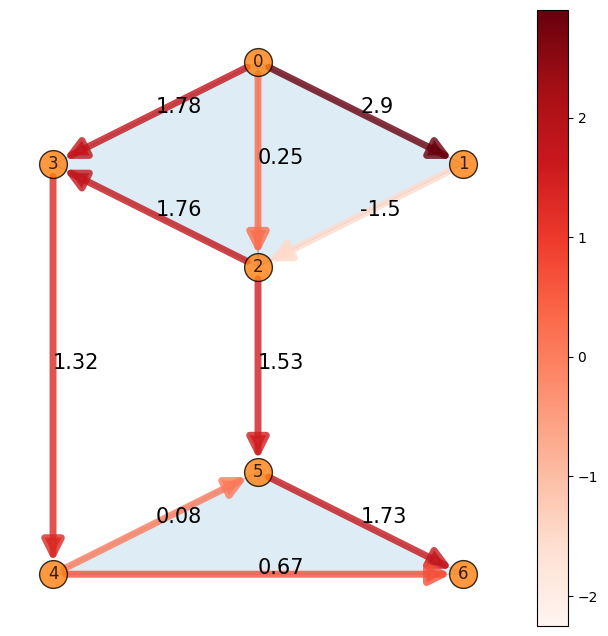

In [10]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

f_est = f_est_h + f_est_c + f_est_g
print("Error:", lsfilter.calculate_error(f_est, f0))

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [11]:
lsfilter.history

{'L1': {'filter': array([[0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8571428571428569]],
        dtype=object),
  'f_estimated': array([ 2.48571429,  0.21428571,  1.52571429, -1.28571429,  1.50857143,
          1.31142857,  1.13142857,  0.06857143,  0.57428571,  1.48285714]),
  'frequency_responses': array([[0.